# Segunda prueba para la detección de plasticos en la arena

## Segmentación de la imagen y entrenamiento entre plastico/arena
### Paso 1: Redimensionar las imagenes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [9]:
from os import scandir, getcwd

#Obtenemos la lista de las imágenes a redimensionar
def lsJPG(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() and arch.name.endswith('.jpg'))]

listImg = lsJPG("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada")
listImg

['1.jpg',
 '10.jpg',
 '2.jpg',
 '3.2.jpg',
 '3.jpg',
 '4.jpg',
 '5.2.jpg',
 '5.jpg',
 '6.jpg',
 '7.2.jpg',
 '7.jpg',
 '8.2.jpg',
 '8.jpg',
 '9.2.jpg',
 '9.jpg']

In [10]:
#Redimensionamos todas las imagenes a 2240x2240, ya que 2240/64 = 35. 

for img in listImg:
    redim = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/"+img)
    nuevo = redim.resize((2240, 2240), Image.ANTIALIAS)
    nuevo.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/"+img)

### Paso 2: Recortar las imágenes en fragmentos

Recortaremos cada imagen en 35*35 imágenes de tamaño 64x64, luego clasificaremos manualmente en un excel si es arena o plastico.

In [37]:
import pandas as pd

In [34]:
n = int(2240/64) #35
listaRegiones = []
for img in listImg:
    recort = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/"+img)
    for i in range(0,n):
        for j in range(0,n):
            region = recort.crop((i*64,j*64,i*64+64,j*64+64))
            subtring = img[0:-4]
            region.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+
                        "imgID"+subtring+"-R"+str(i)+"C"+str(j)+".jpg")
            listaRegiones.append("imgID"+subtring+"-R"+str(i)+"C"+str(j))
    #Primero vamos a segmentar SOLO 1 IMAGEN
    #Una vez que funciona quitamos el break y segmentamos todas las imagenes
    #break


In [36]:
#Creamos un dataframe para las regiones de las imagenes
data = {'Nombre Segmento':listaRegiones, 'Plasticos':[0] * len(listaRegiones)} 
df = pd.DataFrame(data) 
df.to_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/segmentosPlastico.csv", header=True, index=False)
#Manualmente se indicará con un 1 las regiones de las imágenes que tengan plasticos

Para indicar manualmente que región tiene plastico se procedió a realizar una rejilla con photoshop y numerar las casillas. Para hacer la regilla se utilizó el siguiente tutorial: https://es.wikihow.com/hacer-una-rejilla-en-Photoshop

### Paso 3: Preparación de los datos previos a la red neuronal

Vamos a crear el conjunto de datos de entrenamiento y test. Como solo hemos mapeado 4 imágenes. 

In [115]:
import re
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.plotly as py

import plotly
plotly.__version__

'3.4.0'

In [228]:
df2 = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/segmentosPlastico-3img.csv")

filtrado = df2['Nombre Segmento'].str.match(pat = '(imgID1)|(imgID2)|(imgID3)|(imgID3.2)') 
df3 = df2[filtrado]
df3 #Ya tenemos un dataframe donde solo se encuentran las imágenes mapeadas

,Nombre Segmento,Plasticos
0,imgID1-R0C0,0
1,imgID1-R0C1,0
2,imgID1-R0C2,0
3,imgID1-R0C3,0
4,imgID1-R0C4,0
5,imgID1-R0C5,0
6,imgID1-R0C6,0
7,imgID1-R0C7,0
8,imgID1-R0C8,0
9,imgID1-R0C9,0


In [232]:
def filtrado5img(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() 
                                                    and arch.name.endswith('.jpg') 
                                                    and (arch.name.startswith('imgID1')
                                                         or  arch.name.startswith('imgID2')
                                                         or  arch.name.startswith('imgID3')
                                                         or  arch.name.startswith('imgID3.2')))]


listImg = filtrado5img("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\Segmentadas")
len(listImg)

6125

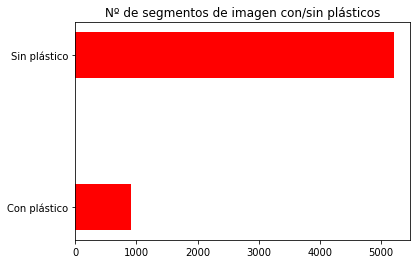

In [233]:
#Contamos cuantos fragmentos tenemos con/sin plásticos
unos = df3[df3['Plasticos'] == 1].count()
ceros = df3[df3['Plasticos'] == 0].count()

#Graficos de barras bonicos ---> https://plot.ly/matplotlib/bar-charts/
plt.barh(["Con plástico","Sin plástico"],[unos.values[0],ceros.values[0]],color="red",height=0.3)
plt.title("Nº de segmentos de imagen con/sin plásticos")

#fig = plt.gcf()
#plotlyFig = tls.mpl_to_plotly(fig)
#py.iplot(plotlyFig, filename='mpl-basic-bar')

plt.show()

Tenemos las clases desvalanceadas, vamos a separar el conjunto de entrenamiento y de test

In [234]:
#Array con todas las imágenes a entrenar 
im_array = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img)) for img in listImg] )
im_array.shape

(6125, 64, 64, 3)

In [235]:
im_array_normal= im_array / 255.0
output = df3.as_matrix() #df.to_numpy() para la versión 0.24
output

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



array([['imgID1-R0C0', 0],
       ['imgID1-R0C1', 0],
       ['imgID1-R0C2', 0],
       ..., 
       ['imgID3-R34C32', 0],
       ['imgID3-R34C33', 0],
       ['imgID3-R34C34', 0]], dtype=object)

In [236]:
output.shape

(6125, 2)

In [135]:
import tensorflow as tf

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(im_array_normal, output, train_size=0.7)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [238]:
Y_train[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

### Paso 4: Creación y entrenamiento de la red neuronal

In [146]:
from keras.models                import Sequential, Model
from keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from keras.preprocessing.image   import ImageDataGenerator
from keras.utils                 import to_categorical
from keras.optimizers            import SGD

In [243]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(64, 64,3)))
model.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
model.add(Activation('relu'))

model.add(Flatten())  
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [244]:
model.fit(X_train, Y_train[:,1],  batch_size=32, epochs=10)

Epoch 1/10
4287/4287 [==============================] - 26s 6ms/step - loss: 0.4398 - acc: 0.8493
Epoch 2/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.4145 - acc: 0.8521
Epoch 3/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.3882 - acc: 0.8523
Epoch 4/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.3354 - acc: 0.8680
Epoch 5/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.2645 - acc: 0.9037
Epoch 6/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.1910 - acc: 0.9356
Epoch 7/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.1260 - acc: 0.9571: 3s - loss: 0
Epoch 8/10
4287/4287 [==============================] - 25s 6ms/step - loss: 0.0814 - acc: 0.9720
Epoch 9/10
4287/4287 [==============================] - 27s 6ms/step - loss: 0.0610 - acc: 0.9802
Epoch 10/10
4287/4287 [==============================] - 26s 6ms/step - loss: 0.0481 - acc: 0.9855


In [245]:
print("---Evaluacion----")
ev = model.evaluate(X_test, Y_test[:,1], batch_size=32)
print(ev) #ev_loss - ev_acc

---Evaluacion----
1838/1838 [==============================] - 4s 2ms/step
[0.50484838872596671, 0.88900979305896199]


Vamos a elegir imágenes fragmentos sin mapear y predecirlos con la red neuronal entrenada, a ver que resultados obtenemos.

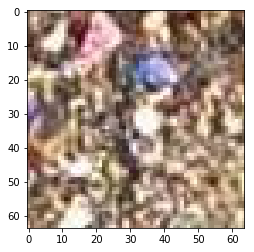

array([[ 0.00021976]], dtype=float32)

In [246]:
ejemplo = np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/imgID8.2-R15C12.jpg"))
plt.imshow(ejemplo)
plt.show()

prueba = ejemplo[np.newaxis,:]/255
#prueba.shape
model.predict(prueba)

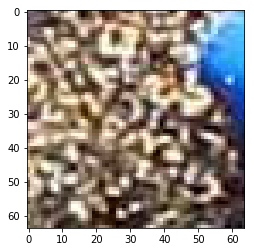

[[ 0.00433666]]
1/1 [==============================] - 0s 5ms/step
[5.4406495094299316, 0.0]


In [247]:
ejemplo = np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/imgID2-R14C18.jpg"))
plt.imshow(ejemplo)
plt.show()

prueba = ejemplo[np.newaxis,:]/255
#prueba.shape
print(model.predict(prueba))

ev2 = model.evaluate(prueba,[1], batch_size=32)
print(ev2) #ev_loss - ev_acc

No está aprendiendo a identificar los plasticos. Vamos a evaluar con todas las imágenes de plastico a ver cuantas acierta

In [248]:
unos = df3[df3['Plasticos'] == 1]
print(unos.head())
im_array = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas/"+img+".jpg")) for img in unos['Nombre Segmento'].tolist()] )

print("\nLas dimensiones del array son: ", im_array.shape)

X_eval = im_array/255
Y_eval = unos['Plasticos'].values

print("\n------Evaluación para imágenes con solo plastico--------")
ev3 = model.evaluate(X_eval,Y_eval, batch_size=32)
print(ev3) #ev_loss - ev_acc

    Nombre Segmento  Plasticos
36      imgID1-R1C1          1
125    imgID1-R3C20          1
195    imgID1-R5C20          1
196    imgID1-R5C21          1
197    imgID1-R5C22          1

Las dimensiones del array son:  (909, 64, 64, 3)

------Evaluación para imágenes con solo plastico--------
909/909 [==============================] - 2s 2ms/step
[5.1417223641318985, 0.29922992300869217]
